# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

# Splitting into Features and Target

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()

X = dataset.data
y = dataset.target

In [ ]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X = torch.tensor(X , dtype = torch.float32)
y = torch.tensor(y , dtype = torch.float32)

In [ ]:
X.shape[1]

4

In [ ]:
y.unique()

tensor([0., 1., 2.])

# Splitting into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Model Defining

In [ ]:
input_size = X.shape[1]
hidden_size = 16
output_size = 3

In [ ]:
class Model(nn.Module):
  def __init__(self , input_size , hidden_size , output_size):
    super(Model , self).__init__()

    self.fc1 = nn.Linear(input_size , hidden_size)

    self.relu = nn.ReLU()

    self.fc2 = nn.Linear(hidden_size , output_size)

  def forward(self , x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)

    return x

In [ ]:
model = Model(input_size , hidden_size , output_size)
print(model)


Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)


# Summary of Model

In [ ]:
from torchsummary import summary
summary(model , input_size = (150 , 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 150, 16]              80
              ReLU-2              [-1, 150, 16]               0
            Linear-3               [-1, 150, 3]              51
Total params: 131
Trainable params: 131
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


# Defining Loss and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)

# Training and Testing

In [ ]:
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(x_train)
    loss = criterion(outputs, y_train.long())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())


    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test)
        test_loss = criterion(test_outputs, y_test.long()).item()
        test_losses.append(test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}")


Epoch [1/100], Train Loss: 0.1290, Test Loss: 0.1165
Epoch [2/100], Train Loss: 0.1288, Test Loss: 0.1163
Epoch [3/100], Train Loss: 0.1286, Test Loss: 0.1161
Epoch [4/100], Train Loss: 0.1284, Test Loss: 0.1159
Epoch [5/100], Train Loss: 0.1281, Test Loss: 0.1158
Epoch [6/100], Train Loss: 0.1279, Test Loss: 0.1156
Epoch [7/100], Train Loss: 0.1277, Test Loss: 0.1154
Epoch [8/100], Train Loss: 0.1275, Test Loss: 0.1152
Epoch [9/100], Train Loss: 0.1272, Test Loss: 0.1150
Epoch [10/100], Train Loss: 0.1270, Test Loss: 0.1148
Epoch [11/100], Train Loss: 0.1268, Test Loss: 0.1147
Epoch [12/100], Train Loss: 0.1266, Test Loss: 0.1145
Epoch [13/100], Train Loss: 0.1264, Test Loss: 0.1143
Epoch [14/100], Train Loss: 0.1262, Test Loss: 0.1141
Epoch [15/100], Train Loss: 0.1259, Test Loss: 0.1139
Epoch [16/100], Train Loss: 0.1257, Test Loss: 0.1138
Epoch [17/100], Train Loss: 0.1255, Test Loss: 0.1136
Epoch [18/100], Train Loss: 0.1253, Test Loss: 0.1134
Epoch [19/100], Train Loss: 0.1251, T

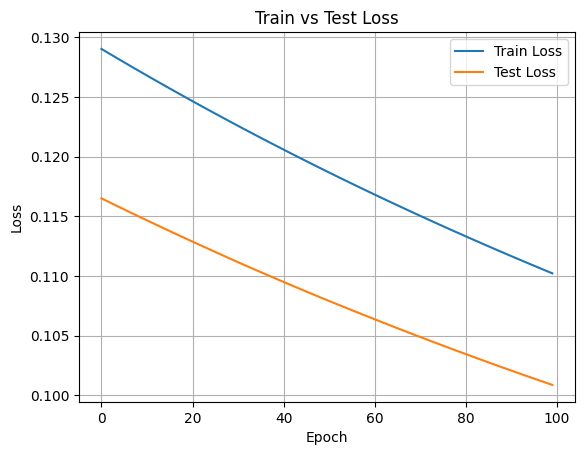

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()
